(This is an early draft of a notebook to be used in the first lab of the 'Machine Learning in Mathematics & Theoretical Physics' school in Oxford in July 2023.)

In [ ]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets#, transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

# Introduction

## Jupyter notebooks and cloud platforms

(A basic introduction to Jupyter notebooks, and then cloud platforms like Google Colab and Kaggle Notebooks.)

...

Two of the most popular cloud platforms are [Google Colab](https://colab.research.google.com/) and [Kaggle notebooks](https://www.kaggle.com/docs/notebooks). You can also use Jupyter's own [applications](https://jupyter.org/try).

In Google Colab, to run a code cell, click it and then either press Shift-Enter or click the arrow button at the left of the cell. You'll see that clicking the code cell also lets you edit it. For a text cell (like this one), double click it to edit, and when you're done editing press Shift-Enter. For more information take a look at Colab [welcome page](https://colab.research.google.com/).

If there is an online notebook that you don't want to interact with but simply view, you can do that with nbviewer like [this](https://nbviewer.org/github/callum-ryan-brodie/oxford-ml-physmath-school/blob/main/oxford_ml_physmath_school_notebook_1.ipynb).

## Deep learning frameworks: PyTorch vs TensorFlow

The most popular frameworks for deep learning are PyTorch and TensorFlow. Within academic publications, TensorFlow was dominant in the past, but more recently it has been rivaled in popularity by PyTorch. In particular, amongst published papers and their accompanying codebases, one sees that PyTorch is now the much more widely-used of the two, as shown in the following plots (taken from [this blog post](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2023/), which contains more details).

...

<img alt="PyTorch vs Tensorflow: papers in 2023" width="500" src="https://github.com/callum-ryan-brodie/oxford-ml-physmath-school/blob/main/images/assemblyai_papers_2023_plot.png?raw=1"/>

<img alt="PyTorch vs Tensorflow: repos in 2023" width="500" src="https://github.com/callum-ryan-brodie/oxford-ml-physmath-school/blob/main/images/assemblyai_repos_2023_plot.png?raw=1"/>


---
## Building neural networks with PyTorch



...

We will use the ```nn.Sequential``` model. This takes as arguments a set of operations, and as the name implies these operations will be applied in sequence, i.e. one after the other to the input, so that together they perform the operation of a neural network.

In [ ]:

test_seq_model = nn.Sequential(
     nn.Linear(2, 1)
    ,nn.Sigmoid()
)

test_seq_model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

For a list of other operations we can include, see the PyTorch [documentation](https://pytorch.org/docs/stable/nn.html).

We can also pick out individual operations in the sequential model:

In [ ]:
seq_model[1]

Linear(in_features=784, out_features=25, bias=True)

Defining the model fixes the neural network architecture, but not the weights. In fact the above initialised the network just with some random weights. So at the moment it's not trained to do anything in particular - given inputs will have fixed outputs but they won't mean anything.

---
## Interlude: Training a model

(Brief overview of training, validation, and test sets)

---
## Training neural networks with PyTorch

---
## Example: Building and training an image classifier

In [ ]:
train_set = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_set = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 103382048.87it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74361997.44it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 34689944.46it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13956431.33it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



Let's take a look at the structure of the data

In [ ]:
image, label = train_set[0]
image.shape

torch.Size([1, 28, 28])

(Q: What would we have instead of 1 if the image was in colour?)

We can look at one of the images. (Here `squeeze()` removes the first index of the tensor, as you can see by checking `image.squeeze().shape`.)

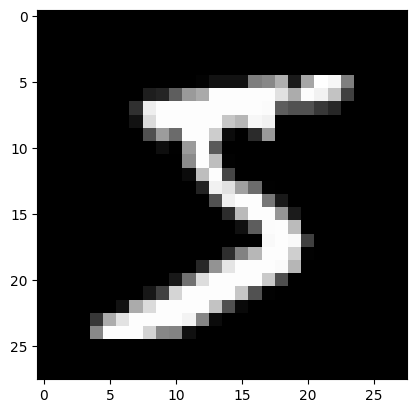

In [ ]:
plt.imshow(image.squeeze(), cmap='gray');

In [ ]:
BATCH_SIZE = 64

train_dataloader = DataLoader(train_set, batch_size=BATCH_SIZE)
test_dataloader = DataLoader(test_set, batch_size=BATCH_SIZE)

Take a look at a batch

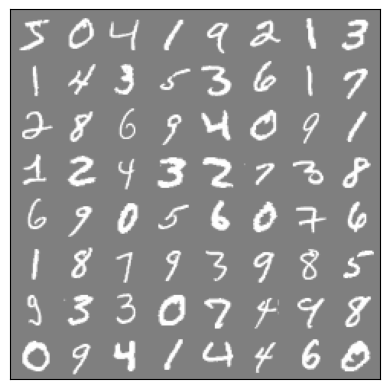

In [ ]:

def imshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.tick_params(left=False, bottom=False, labelbottom=False, labelleft=False)
    plt.show()

dataiter = iter(train_dataloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

Construct the neural network

The image has $28 \times 28 = 784$ pixels

We will unroll this two-dimensional array into a one-dimensional array with $28 \times 28 = 784$ elements

(Q: Would it make sense to make the hidden layer have more nodes than the input layer? Or is it more sensible to give it fewer nodes?)

(Q: What about comparing it to the number of nodes in the output layer? Would it be sensible to use fewer nodes than the output layer in this context? What would be the interpretation of doing that?)

In [ ]:
num_in = image.numel()
num_out = len(train_set.classes)

num_hidden = 25 # to be changed

In [ ]:

seq_model = nn.Sequential(
     nn.Flatten(start_dim=1) #leaves the 0th index unflattened
    ,nn.Linear(num_in, num_hidden)
    ,nn.ReLU()
    ,nn.Linear(num_hidden, num_out)
)

seq_model

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=25, bias=True)
  (2): ReLU()
  (3): Linear(in_features=25, out_features=10, bias=True)
)

In [ ]:
seq_model(image.unsqueeze(0))

tensor([[ 0.1659, -0.0778,  0.0013, -0.0289,  0.1541,  0.1693,  0.0243,  0.0824,
          0.1477,  0.1054]], grad_fn=<AddmmBackward0>)

By default, the neural network, and the tensors being passed as inputs and received as outputs, are on the CPU. For example:

In [ ]:
image.device

device(type='cpu')

(Discussion of training on a GPU vs a CPU.)

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

# We tell it we want to use the GPU
seq_model.to(device);

Using cpu device


The network and the tensors being passed to it need to be on the same device.For example, if we try to pass a tensor living on the CPU to the network which lives on the GPU, we will get an error, as you can see by running the following code cell.

In [ ]:
try:
  seq_model(image.unsqueeze(0)).device
except Exception as e:
  print(e)

In [ ]:
seq_model(image.unsqueeze(0).to(device)).device

device(type='cpu')

Set up gradient descent

In [ ]:
learning_rate = 1e-3

optimizer = torch.optim.Adam(seq_model.parameters(), lr=learning_rate)

The loss function

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


#def test_loop(dataloader, model, loss_fn):
#    model.eval()
#    size = len(dataloader.dataset)
#    num_batches = len(dataloader)
#    test_loss, correct = 0, 0

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, seq_model, loss_fn, optimizer)
    test_loop(test_dataloader, seq_model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.306519  [   64/60000]
loss: 0.685290  [ 6464/60000]
loss: 0.423762  [12864/60000]
loss: 0.448461  [19264/60000]
loss: 0.293061  [25664/60000]
loss: 0.359924  [32064/60000]
loss: 0.205110  [38464/60000]
loss: 0.417699  [44864/60000]
loss: 0.337745  [51264/60000]
loss: 0.348609  [57664/60000]
Test Error: 
 Accuracy: 91.9%, Avg loss: 0.284996 

Epoch 2
-------------------------------
loss: 0.232665  [   64/60000]
loss: 0.262884  [ 6464/60000]
loss: 0.184519  [12864/60000]
loss: 0.319760  [19264/60000]
loss: 0.234365  [25664/60000]
loss: 0.307769  [32064/60000]
loss: 0.145983  [38464/60000]
loss: 0.379304  [44864/60000]
loss: 0.269052  [51264/60000]
loss: 0.279720  [57664/60000]
Test Error: 
 Accuracy: 92.8%, Avg loss: 0.242640 

Epoch 3
-------------------------------
loss: 0.164791  [   64/60000]
loss: 0.223119  [ 6464/60000]
loss: 0.145085  [12864/60000]
loss: 0.274339  [19264/60000]
loss: 0.227759  [25664/60000]
loss: 0.271248  [32064/600

---
### Interpretability of a neural network

Check out [this video](https://youtu.be/aircAruvnKk) by 3Blue1Brown, in the specific context of handwritten digit recognition

Check out Figure 2 of [this paper](https://arxiv.org/abs/1311.2901), in the broader context of image recognition

# Other exercises

(Possibly I should include some basic training of linear and logistic regression. Or maybe to fit best with the lectures I'll just stick with neural networks.)

---
# Linear and logistic regression

Single input: $x$

Include the bias:
$\tilde{x} = (1,x)$

Also useful then to define:
$\tilde{\theta} = (1,\theta)$

Matrix with $\tilde{x}^{(i)}$ as rows: $\tilde{X}$

In [ ]:
import numpy as np

## Linear regression

### The cost function

The classic cost function in linear regression is the sum-of-squares,
$$
J(\Theta) = \frac{1}{2m}\sum_{i=1}^m(h_\Theta(x^{(i)})-y^{(i)})^2 \,.
$$

$\Theta X$

(See for example Chapter 1 of Bishop for a deeper understanding of whether the sum-of-squares is a sensible cost function.)

In the above notation, the predicted value is
$$
h_\Theta(x^{(i)}) = 1 + \theta \cdot x^{(i)} \equiv \tilde{\theta} \cdot \tilde{x}^{(i)}
$$


To compute , and the overall sum, you could use a set of `for` loops, but where possible it is typically much faster to use implementations of matrix and vector operations from a standard software
libary such as NumPy. The syntax for some NumPy operations you might to use below are as follows.

```python
# import numpy as np

# Matrix multiplication:
np.dot(A,B)

# Dot product between two vectors:
np.inner(u,v)
```

In [ ]:
def compute_cost_lin(X, y, Theta):

  m = len(y); # number of training examples

  diffs = (np.dot(X,Theta)-y)
  J = (1/(2*m)) * np.inner(diffs,diffs)

  return J

### Gradient descent

### Training the model

## Logistic regression

---
# Deep learning with a CPU vs a GPU (vs a TPU)

getting set up locally to get the software library to use your gpu can be fiddly

## Google Colab

If you're using Google Colab, you can switch between a CPU, a GPU, or a TPU by clicking 'Change runtime type' under 'Runtume' in the menu bar. You can experiment to see how the change affects the training of your neural network.

Note that unless you pay for pay for Colab Pro / Pro+ (or pay individually for compute units), Google places a quota on how much GPU / TPU compute time you can use in a given time period. (The precise quotas aren't published, ostensibly because they tend to vary over time.)

(You can also use a GPU or a TPU in a Kaggle notebook, by opening the sidebar (by clicking on the tiny arrow in the bottom right), and expanding 'Notebook options'.)

### Ending your session

If you're using Google Colab with a GPU / TPU, then to conserve your compute allowance you may want to make sure you end your session when you're done. This can be done either by clicking 'Disconnect and delete runtime' under 'Runtime' in the menu bar, or in a cell with the following code:

```python
from google.colab import runtime
runtime.unassign()
```